In [1]:
from setting import *

%matplotlib inline

In [2]:
kbstar_bnd = fdr.DataReader('114100')
kodex200 = fdr.DataReader('069500')

data = pd.DataFrame()
data['kodex200'] = kodex200['Close']
data['kbstar_bnd'] = kbstar_bnd['Close']
data = data.dropna()
print('data \n', data)

data 
             kodex200  kbstar_bnd
Date                            
2009-07-29     16044     76226.0
2009-07-30     16182     76367.0
2009-07-31     16444     76217.0
2009-08-03     16471     75959.0
2009-08-04     16500     75965.0
...              ...         ...
2022-11-23     31465    107675.0
2022-11-24     31760    108215.0
2022-11-25     31630    108375.0
2022-11-28     31245    108300.0
2022-11-29     31600    108205.0

[3295 rows x 2 columns]


In [3]:
s = bt.Strategy('stock vs bond 1:1 rebalancing',
                [bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=True, run_on_last_date=False),
                 #bt.algos.PrintInfo('{name} : {now}'),
                 bt.algos.SelectAll(),
                 bt.algos.WeighEqually(),
                 bt.algos.Rebalance()])
test = bt.Backtest(s, data, initial_capital=100000000.0)

In [4]:
kodex200 = buy_n_hold(data['kodex200'].to_frame(), name='kodex200')
kbstar_bnd = buy_n_hold(data['kbstar_bnd'].to_frame(), name='kbstar_bnd')

result = bt.run(test, kodex200, kbstar_bnd)

Stat                 stock vs bond 1:1 rebalancing    kodex200    kbstar_bnd
-------------------  -------------------------------  ----------  ------------
Start                2009-07-28                       2009-07-28  2009-07-28
End                  2022-11-29                       2022-11-29  2022-11-29
Risk-free rate       0.00%                            0.00%       0.00%

Total Return         72.53%                           96.94%      41.92%
Daily Sharpe         0.53                             0.39        1.55
Daily Sortino        0.87                             0.62        2.49
CAGR                 4.17%                            5.21%       2.66%
Max Drawdown         -20.22%                          -38.08%     -5.53%
Calmar Ratio         0.21                             0.14        0.48

MTD                  3.58%                            5.46%       1.71%
3m                   0.79%                            0.23%       0.87%
6m                   -4.13%              

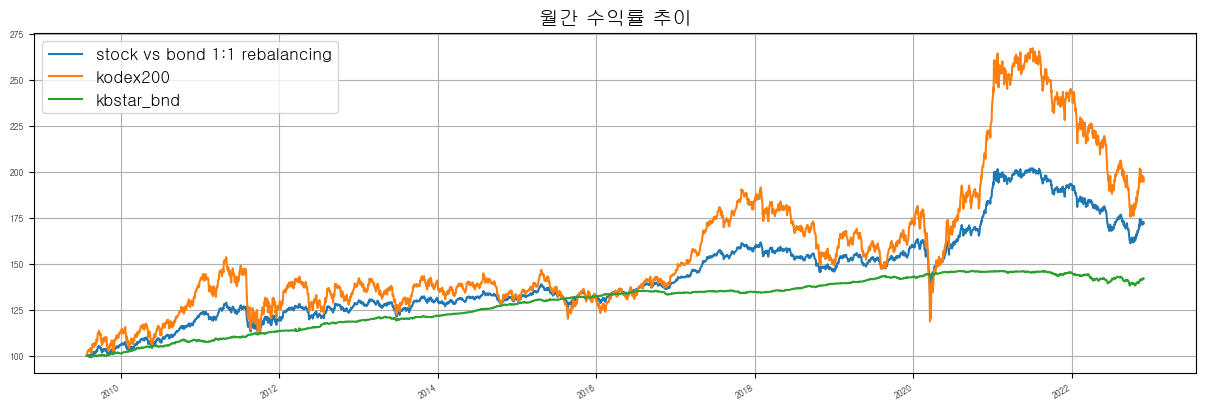

In [5]:
result.plot()
plt.title('월간 수익률 추이')

print(result.display())
print(result.display_monthly_returns())

<AxesSubplot:>

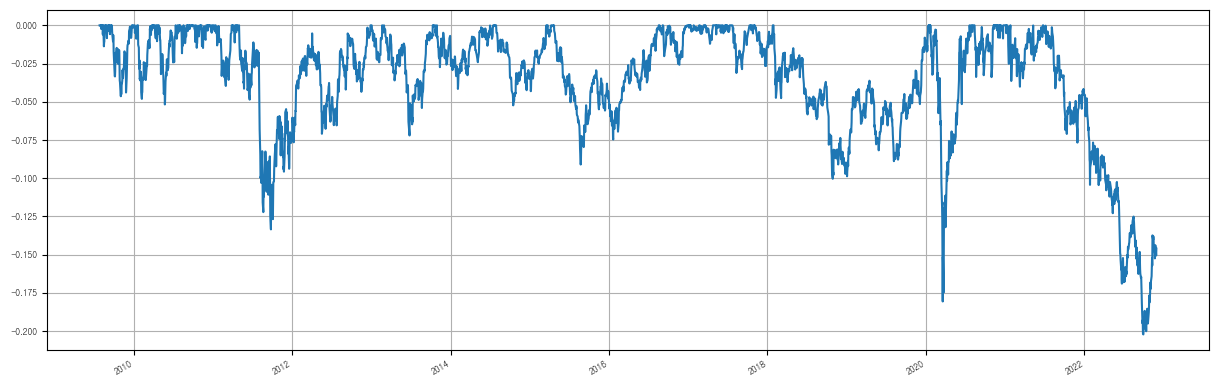

In [6]:
result.backtests['stock vs bond 1:1 rebalancing'].stats.drawdown.plot(figsize=(15,5))